## EDA & Data Preprocessing
- Wordcloud
- Word count
- Word frequency
- Boxplot
- Sentiment Analysis

In [3]:
import pandas as pd

In [4]:
# Load the dataset
df = pd.read_csv('/Users/anna/Desktop/ANLP/Assignments/archive/Reviews.csv')

In [167]:
df.head(10) #view first 10 rows of df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [168]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [169]:
df.count()

Id                        568454
ProductId                 568454
UserId                    568454
ProfileName               568438
HelpfulnessNumerator      568454
HelpfulnessDenominator    568454
Score                     568454
Time                      568454
Summary                   568427
Text                      568454
dtype: int64

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [5]:
# Convert Time column to datetime format
df['Time'] = pd.to_datetime(df['Time'], unit='s')
df['Time'].max()

Timestamp('2012-10-26 00:00:00')

In [172]:
#Get Max and Min of dataset
df.max(axis=0)
df.min(axis=0)

/var/folders/vt/18d8cm9d3yz9mm6xl9gv0v0r0000gn/T/ipykernel_39857/641832910.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.max(axis=0)
/var/folders/vt/18d8cm9d3yz9mm6xl9gv0v0r0000gn/T/ipykernel_39857/641832910.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.min(axis=0)


Id                                                                        1
ProductId                                                        0006641040
UserId                                                   #oc-R103C0QSV1DF5E
HelpfulnessNumerator                                                      0
HelpfulnessDenominator                                                    0
Score                                                                     1
Time                                                    1999-10-08 00:00:00
Text                      ! think I just ruined my dish. open this and p...
dtype: object

In [173]:
#Word Count

def word_count(text): #create function split whitespace characters and calculating length
    wc = len(text.split())
    return wc

In [174]:
df['text_word_count'] = df['Text'].apply(word_count) #apply function to df

In [175]:
df['text_word_count'].describe()

count    568454.000000
mean         80.264023
std          79.455384
min           3.000000
25%          33.000000
50%          56.000000
75%          98.000000
max        3432.000000
Name: text_word_count, dtype: float64

In [176]:
#conda install matplotlib
#conda install -c anaconda seaborn
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Word Count Distribution')

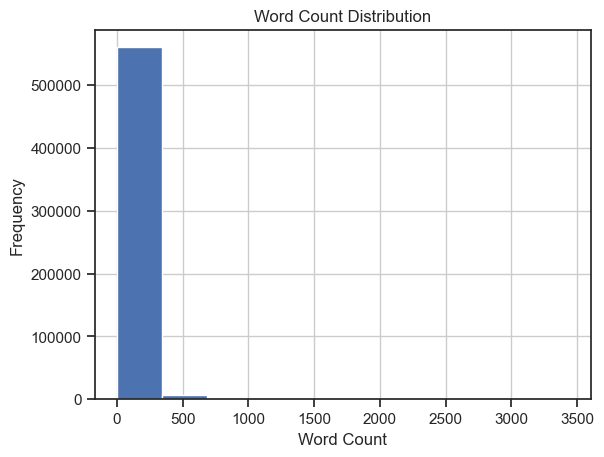

In [177]:
df['text_word_count'].hist(bins=10)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Word Count Distribution')

Text(0.5, 1.0, 'Boxplot Score vs Word Count')

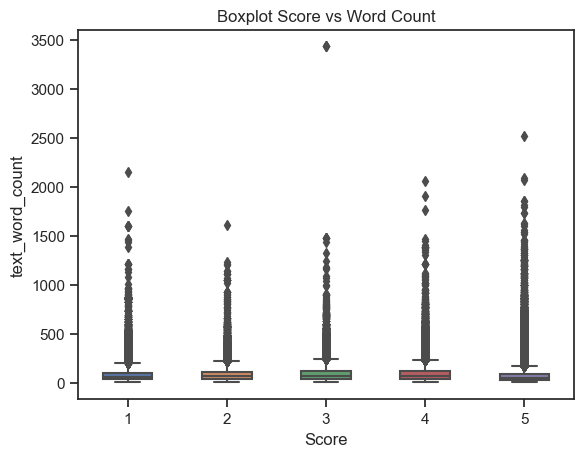

In [178]:
sns.boxplot(x = "Score", 
            y = "text_word_count",
            width=0.5,
            data =df);
plt.title('Boxplot Score vs Word Count')

Text(0.5, 1.0, 'Boxplot Score vs Word Count')

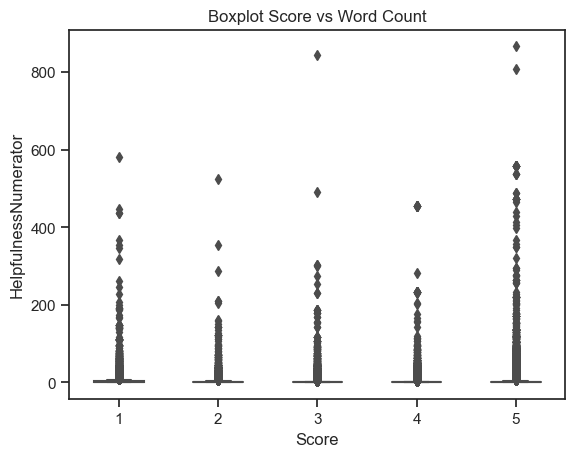

In [179]:
#Distribution of rating scores and average helpfulness
sns.boxplot(x = "Score", 
            y = "HelpfulnessNumerator",
            width=0.5,
            data =df);
plt.title('Boxplot Score vs Word Count')

In [6]:
#Word Frequency
#conda install -c anaconda nltk
import nltk
from nltk.tokenize import word_tokenize

In [9]:
#Calculate frequencies to determine most common word in the column 'Text'

# Convert series to string
text = df['Text'].to_string()
text = text.lower() #convert to lowercase


In [ ]:
#create word tokens
tokenized_words=word_tokenize(text)

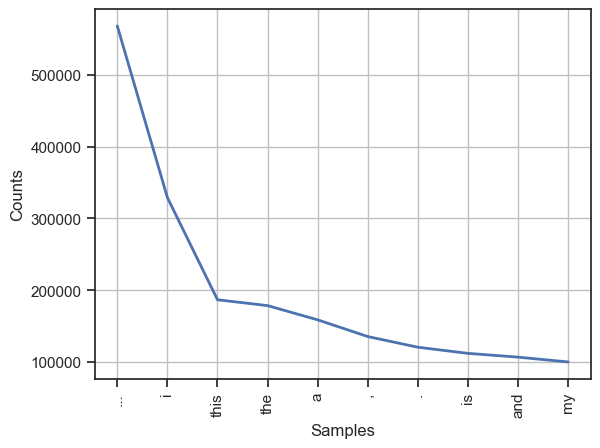

[('...', 568163), ('i', 329129), ('this', 186746), ('the', 178594), ('a', 158767), (',', 135491), ('.', 120641), ('is', 112079), ('and', 106813), ('my', 100131), ('of', 83310), ('to', 82877), ('these', 78502), ('for', 68168), ('it', 65627), ('have', 59020), ('are', 48499), ('love', 47961), ('was', 46396), ('in', 44233)]


In [ ]:
all_words=nltk.FreqDist(tokenized_words)
all_words.plot(10);
print(all_words.most_common(20))

In [183]:
#Word Cloud
#conda install -c conda-forge wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud(max_words=100).generate(text)


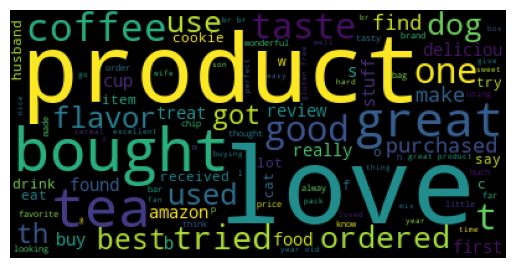

In [184]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Time Distribution')

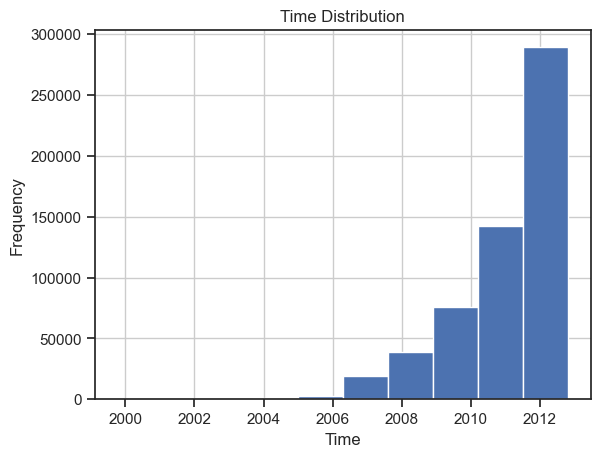

In [185]:
#Time Distribution plot 1999-2012
#More records in 2012 than 1999
#Time distribution can be useful that newer reviews require more predictions

df['Time'].hist(bins=10)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Time Distribution')


## Data Preprocessing


In [186]:
#Lowercase
#Tokenisation
#Stopwords
#Lemmatization
#Infrequent Words

In [10]:
# Data Transformation: Converting article text to lowercase as Python is case-sensitive
df['Text'] = df['Text'].astype(str).str.lower()
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,i have bought several of the vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,product arrived labeled as jumbo salted peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",this is a confection that has been around a fe...


In [11]:
# Data Tokenisation create word tokens
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

df['text_token']=df['Text'].apply(regexp.tokenize)
df.head(3)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,text_token
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,i have bought several of the vitality canned d...,"[i, have, bought, several, of, the, vitality, ..."
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, as, jumbo, salted,..."
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",this is a confection that has been around a fe...,"[this, is, a, confection, that, has, been, aro..."


In [12]:
# Stopwords: Set up stop words for removal
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords = nltk.corpus.stopwords.words("english")
print(stopwords)

# Extend the list with your own custom stopwords
my_stopwords = ["'...", ",", ".", "this", "a", "the", "'s", "n't", "'ve"]
stopwords.extend(my_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /Users/anna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
df['text_token'] = df['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,text_token
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,i have bought several of the vitality canned d...,"[bought, several, vitality, canned, dog, food,..."
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, jumbo, salted, pea..."
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",this is a confection that has been around a fe...,"[confection, around, centuries, light, pillowy..."


In [14]:
#Remove infrequent words
#We first change the format of text_token to strings and keep only words which are longer than 2 letters
df['text_string'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
df[['Text', 'text_token', 'text_string']].head()

,Text,text_token,text_string
0,i have bought several of the vitality canned d...,"[bought, several, vitality, canned, dog, food,...",bought several vitality canned dog food produc...
1,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, jumbo, salted, pea...",product arrived labeled jumbo salted peanuts p...
2,this is a confection that has been around a fe...,"[confection, around, centuries, light, pillowy...",confection around centuries light pillowy citr...
3,if you are looking for the secret ingredient i...,"[looking, secret, ingredient, robitussin, beli...",looking secret ingredient robitussin believe f...
4,great taffy at a great price. there was a wid...,"[great, taffy, great, price, wide, assortment,...",great taffy great price wide assortment yummy ...


In [15]:
#Create a list of all words
all_words = ' '.join([word for word in df['text_string']])

In [16]:
#Tokenise all words
tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [21]:
#Frequency distribution
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist

FreqDist({'like': 256215, 'good': 200638, 'one': 176867, 'taste': 172856, 'product': 167739, 'great': 167175, 'coffee': 166782, 'flavor': 148023, 'tea': 138198, 'food': 128513, ...})

In [22]:
#Drop words that appear less than 3 times
df['text_string_fdist'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 3 ]))

In [23]:
df[['Text', 'text_token', 'text_string', 'text_string_fdist']].head()

,Text,text_token,text_string,text_string_fdist
0,i have bought several of the vitality canned d...,"[bought, several, vitality, canned, dog, food,...",bought several vitality canned dog food produc...,bought several vitality canned dog food produc...
1,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, jumbo, salted, pea...",product arrived labeled jumbo salted peanuts p...,product arrived labeled jumbo salted peanuts p...
2,this is a confection that has been around a fe...,"[confection, around, centuries, light, pillowy...",confection around centuries light pillowy citr...,confection around centuries light pillowy citr...
3,if you are looking for the secret ingredient i...,"[looking, secret, ingredient, robitussin, beli...",looking secret ingredient robitussin believe f...,looking secret ingredient robitussin believe f...
4,great taffy at a great price. there was a wid...,"[great, taffy, great, price, wide, assortment,...",great taffy great price wide assortment yummy ...,great taffy great price wide assortment yummy ...


In [24]:
#Lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /Users/anna/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/anna/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [25]:
from nltk.stem import WordNetLemmatizer
wordnet_lem = WordNetLemmatizer()
df['text_string_lem'] = df['text_string_fdist'].apply(wordnet_lem.lemmatize)

In [199]:
# check if the columns are equal
df['is_equal']= (df['text_string_fdist']==df['text_string_lem'])
# show level count
df.is_equal.value_counts()

True    568454
Name: is_equal, dtype: int64

In [ ]:
all_words_lem = ' '.join([word for word in df['text_string_lem']])

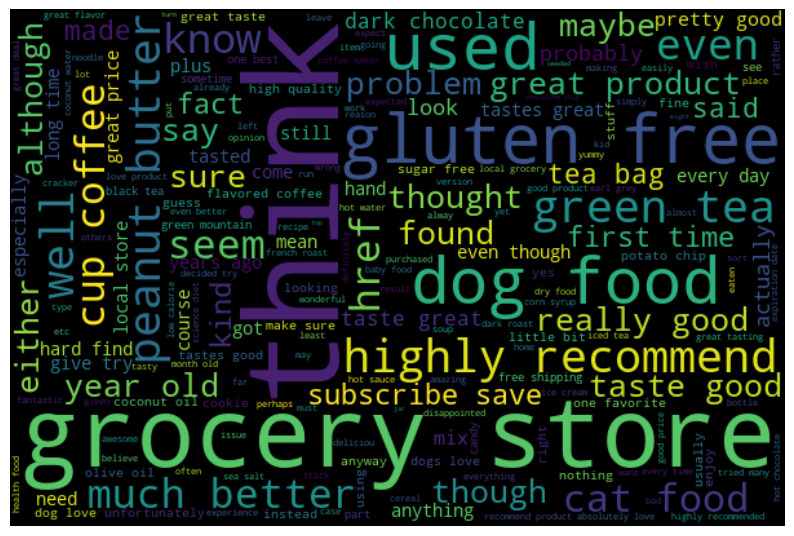

In [202]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [203]:
#Frequency Distribution 
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/anna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

In [205]:
fd.most_common(3)

[('like', 256215), ('good', 200638), ('one', 176867)]

In [206]:
fd.tabulate(3)

  like   good    one 
256215 200638 176867 


In [207]:
#Plot common words

# Obtain top 10 words
top_10 = fd.most_common(10)


In [208]:
# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))

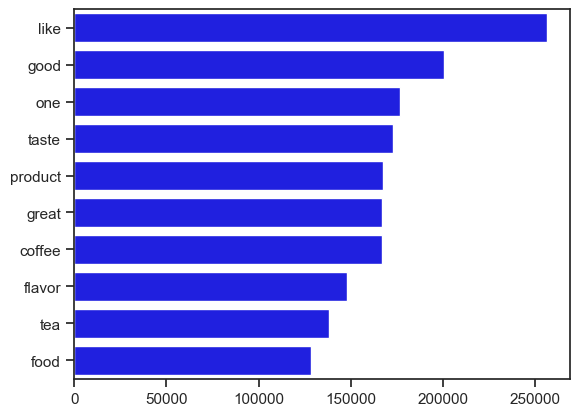

In [209]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='blue');

In [210]:
fd["problem"] #search specific word

19352

In [211]:
#Sentiment Analysis
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anna/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [33]:
#Sentiment Intensity Analyzer

from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [34]:
df['polarity'] = df['text_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
df.tail(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,text_token,text_string,text_string_fdist,text_string_lem,Helpfulness,polarity
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012-02-21,Perfect for our maltipoo,"these stars are small, so you can give 10-15 o...","[stars, small, give, 10, 15, one, training, se...",stars small give one training session tried tr...,stars small give one training session tried tr...,stars small give one training session tried tr...,1.0,"{'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'comp..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,2012-03-13,Favorite Training and reward treat,these are the best treats for training and rew...,"[best, treats, training, rewarding, dog, good,...",best treats training rewarding dog good groomi...,best treats training rewarding dog good groomi...,best treats training rewarding dog good groomi...,1.0,"{'neg': 0.062, 'neu': 0.283, 'pos': 0.654, 'co..."
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,2012-05-31,Great Honey,"i am very satisfied ,product is as advertised,...","[satisfied, product, advertised, use, cereal, ...",satisfied product advertised use cereal raw vi...,satisfied product advertised use cereal raw vi...,satisfied product advertised use cereal raw vi...,NaN,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp..."


In [39]:
#Transform Data
# Change data structure
df = pd.concat(
    [df.drop(['Summary' ], axis=1), 
    df['polarity'].apply(pd.Series)], axis=1)
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Text,text_token,text_string,text_string_fdist,text_string_lem,Helpfulness,polarity,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,i have bought several of the vitality canned d...,"[bought, several, vitality, canned, dog, food,...",bought several vitality canned dog food produc...,bought several vitality canned dog food produc...,bought several vitality canned dog food produc...,1.0,"{'neg': 0.0, 'neu': 0.503, 'pos': 0.497, 'comp...",0.000,0.503,0.497,0.9413
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, jumbo, salted, pea...",product arrived labeled jumbo salted peanuts p...,product arrived labeled jumbo salted peanuts p...,product arrived labeled jumbo salted peanuts p...,NaN,"{'neg': 0.129, 'neu': 0.762, 'pos': 0.11, 'com...",0.129,0.762,0.110,-0.1027
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,this is a confection that has been around a fe...,"[confection, around, centuries, light, pillowy...",confection around centuries light pillowy citr...,confection around centuries light pillowy citr...,confection around centuries light pillowy citr...,1.0,"{'neg': 0.171, 'neu': 0.544, 'pos': 0.285, 'co...",0.171,0.544,0.285,0.8073


In [40]:
# Create new variable with sentiment "neutral," "positive" and "negative"

# Generate polarity scores for each review and sentiment

df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
df.head(4)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Text,text_token,text_string,text_string_fdist,text_string_lem,Helpfulness,polarity,neg,neu,pos,compound,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,i have bought several of the vitality canned d...,"[bought, several, vitality, canned, dog, food,...",bought several vitality canned dog food produc...,bought several vitality canned dog food produc...,bought several vitality canned dog food produc...,1.0,"{'neg': 0.0, 'neu': 0.503, 'pos': 0.497, 'comp...",0.000,0.503,0.497,0.9413,positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, jumbo, salted, pea...",product arrived labeled jumbo salted peanuts p...,product arrived labeled jumbo salted peanuts p...,product arrived labeled jumbo salted peanuts p...,NaN,"{'neg': 0.129, 'neu': 0.762, 'pos': 0.11, 'com...",0.129,0.762,0.110,-0.1027,negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,this is a confection that has been around a fe...,"[confection, around, centuries, light, pillowy...",confection around centuries light pillowy citr...,confection around centuries light pillowy citr...,confection around centuries light pillowy citr...,1.0,"{'neg': 0.171, 'neu': 0.544, 'pos': 0.285, 'co...",0.171,0.544,0.285,0.8073,positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,if you are looking for the secret ingredient i...,"[looking, secret, ingredient, robitussin, beli...",looking secret ingredient robitussin believe f...,looking secret ingredient robitussin believe f...,looking secret ingredient robitussin believe f...,1.0,"{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'comp...",0.000,0.854,0.146,0.4404,positive


In [ ]:
#Analyse Data
# Text with highest positive sentiment
df.loc[df['compound'].idxmax()].values

array([68701, 'B0051BWU92', 'A2GZG363BPADYC', 'Larry Deemer', 4, 4, 5,
       Timestamp('2011-12-16 00:00:00'),
       '*********************************************************<br /> update:  read the update below first. thanks. (june 15 and august 3, 2012)<br />*********************************************************<br />  i was, but no more (actively anyway). we have four cats: two ("normals") who eat about anything, one with kidney disease (crf/ckd) and accompanying reduced appetite, and one that has picky (and weird) tastes.  in the process of trying to find an appetite stimulant for the mom-cat (with crf/ckd) i tried out several products on her and the others (the kids) as well.<br />here are the results of this less than scientific (or definitive) survey:<br /><br />  drs.foster&smith shrimp snappies treats (ground to powder)-----------all refused.<br />  freeze-dried powders (prowl and ziwi peak)----------------------------no effect. all but one (ms. picky) ate them.<br />  s

<Axes: xlabel='count', ylabel='sentiment'>

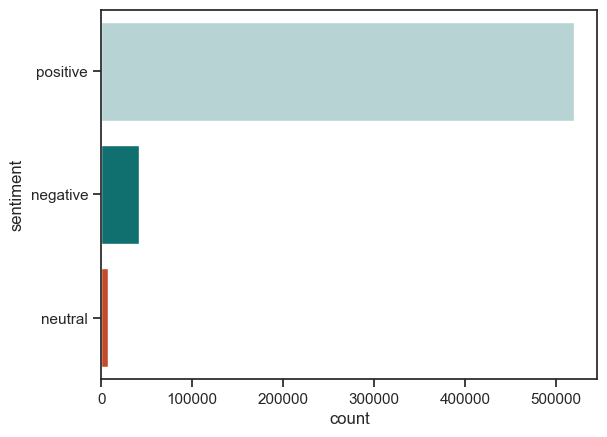

In [225]:
#Visualise Sentiment
#Reviews are mostly positive
# Number of Reviews
sns.countplot(y='sentiment', 
             data=df, 
             palette=['#b2d8d8',"#008080", '#db3d13'])


In [ ]:
#import pandas as pd
#from nltk.sentiment.vader import SentimentIntensityAnalyzer
#sent = SentimentIntensityAnalyzer()
#df_vader = pd.read_csv('/Users/anna/Desktop/ANLP/Assignments/archive/Reviews.csv', usecols = ['Text'])
#polarity = [round(sent.polarity_scores(i)['compound'], 2) for i in df_vader['Text']]
#df_vader['sentiment_score'] = polarity
#df_vader.head()

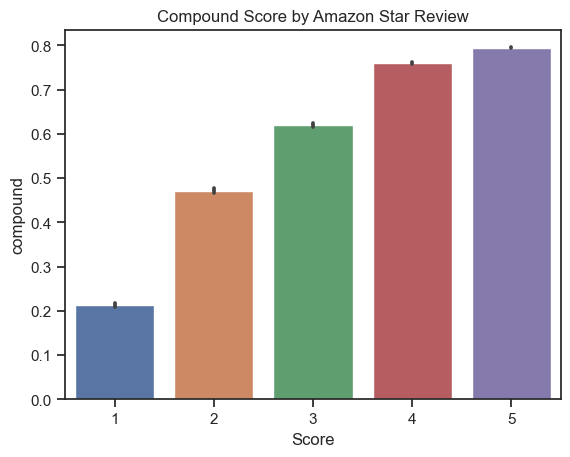

In [226]:
#compound score is the aggregate of the score of a word, or precisely, the sum of all words in the lexicon, normalized between -1 and 1.
ax = sns.barplot(data=df,x='Score',y='compound')
ax.set_title("Compound Score by Amazon Star Review")
plt.show()

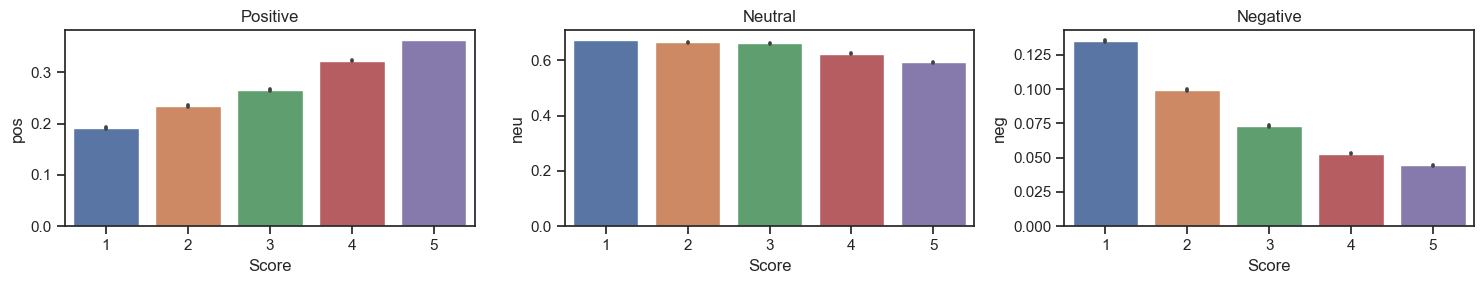

In [227]:
fig , axs = plt.subplots(1,3,figsize=(15,3))
sns.barplot(data=df,x="Score",y="pos",ax=axs[0])
sns.barplot(data=df,x="Score",y="neu",ax=axs[1])
sns.barplot(data=df,x="Score",y="neg",ax=axs[2])

axs[0].set_title("Positive")
axs[1].set_title("Neutral")
axs[2].set_title("Negative")

plt.tight_layout()
plt.show()

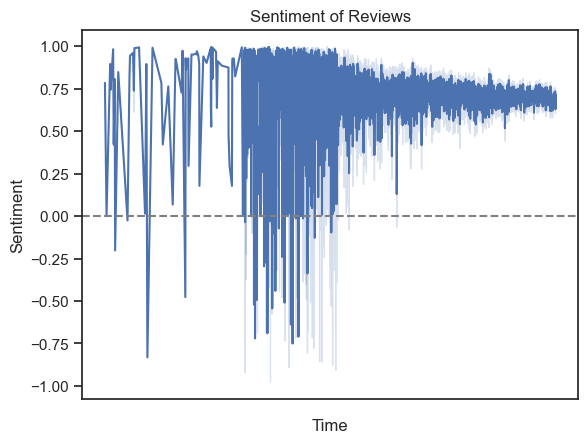

In [ ]:
# Lineplot
g = sns.lineplot(x='Time', y='compound', data=df)

g.set(xticklabels=[]) 
g.set(title='Sentiment of Reviews')
g.set(xlabel="Time")
g.set(ylabel="Sentiment")
g.tick_params(bottom=False)

g.axhline(0, ls='--', c = 'grey');

In [228]:
#Filter negative reviews
neg_review=df[df['sentiment']=='negative']
#Filter neutral reviews
neu_review=df[df['sentiment']=='neutral']
#Filter positive reviews
pos_review=df[df['sentiment']=='positive']

In [229]:
# Generate Negative word cloud
all_words_lem_neg = ' '.join([word for word in neg_review['text_string_lem']])

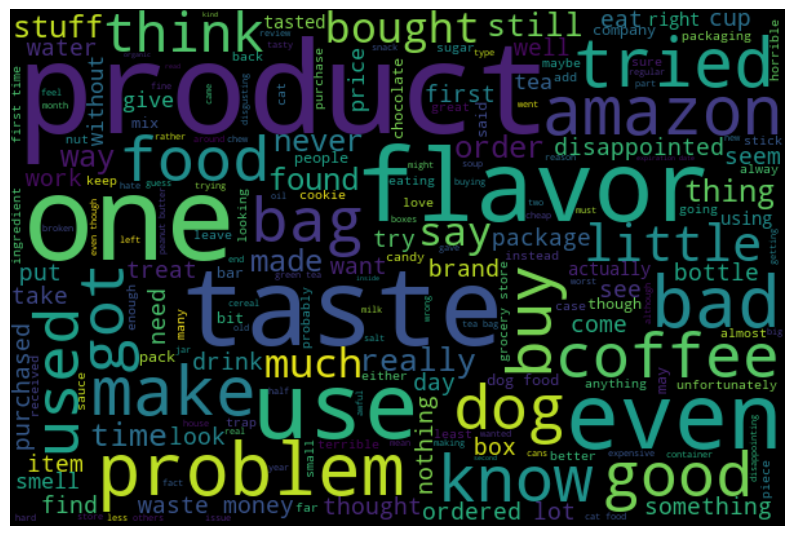

In [230]:
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem_neg)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [231]:
# Generate Neutral word cloud
all_words_lem_neu = ' '.join([word for word in neu_review['text_string_lem']])

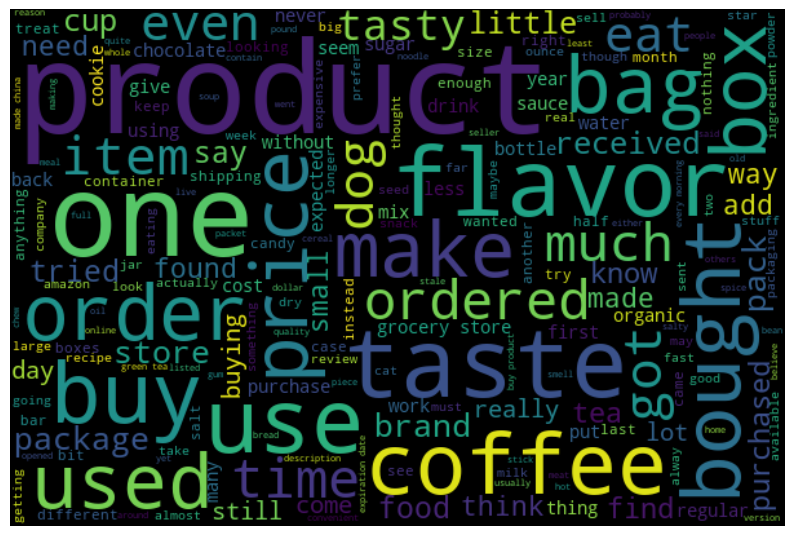

In [232]:
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem_neu)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [233]:
# Generate Positive word cloud
all_words_lem_pos = ' '.join([word for word in pos_review['text_string_lem']])

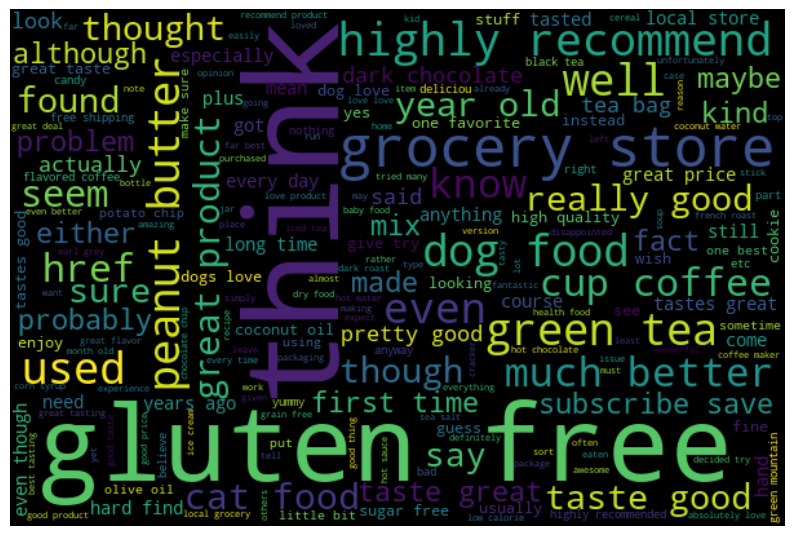

In [234]:
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem_pos)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

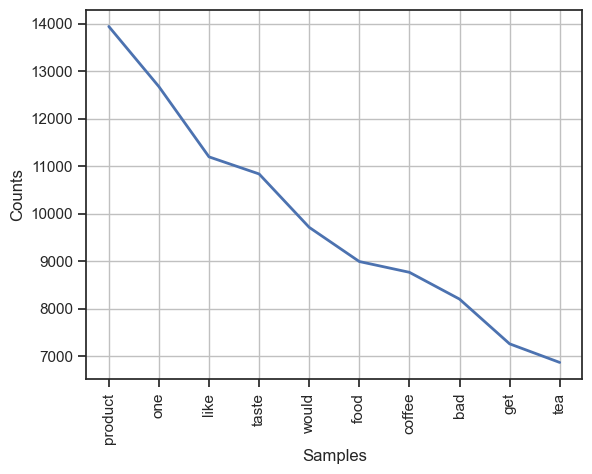

<Axes: xlabel='Samples', ylabel='Counts'>

In [235]:
#Plot negative reviews frequency distribution
neg_review['text_string_lem'].apply(lambda x: nltk.FreqDist(nltk.tokenize.word_tokenize(x))).sum().plot(10)


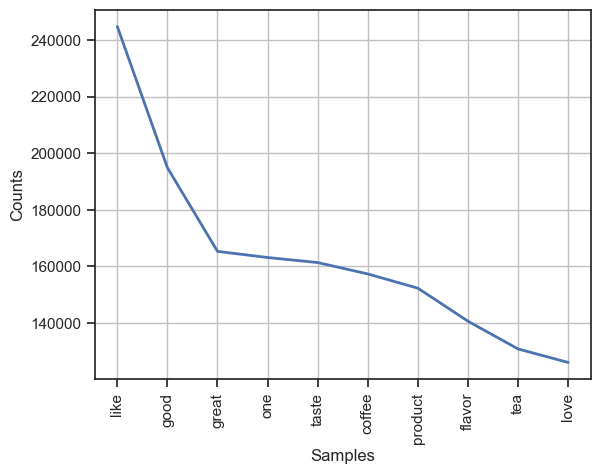

<Axes: xlabel='Samples', ylabel='Counts'>

In [236]:
#Plot negative reviews frequency distribution
pos_review['text_string_lem'].apply(lambda x: nltk.FreqDist(nltk.tokenize.word_tokenize(x))).sum().plot(10)


In [105]:
# Add Helpfulness Column
df['Helpfulness'] = df['HelpfulnessNumerator']/df['HelpfulnessDenominator']
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Text,text_token,...,char_count,capital_word_count,quoted_word_count,stopword_count,unique_word_count,punct_count,avg_wordlength,avg_sentlength,unique_vs_words,stopwords_vs_words
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,i have bought several of the vitality canned d...,"[bought, several, vitality, canned, dog, food,...",...,164,0,0,0,21,"{'! count': 0, '"" count': 0, '# count': 0, '$ ...",7.130435,23.0,0.913043,0.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, jumbo, salted, pea...",...,133,0,0,0,15,"{'! count': 0, '"" count': 0, '# count': 0, '$ ...",7.388889,18.0,0.833333,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,this is a confection that has been around a fe...,"[confection, around, centuries, light, pillowy...",...,282,0,0,0,36,"{'! count': 0, '"" count': 0, '# count': 0, '$ ...",7.230769,39.0,0.923077,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,if you are looking for the secret ingredient i...,"[looking, secret, ingredient, robitussin, beli...",...,128,0,0,0,18,"{'! count': 0, '"" count': 0, '# count': 0, '$ ...",7.111111,18.0,1.000000,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,great taffy at a great price. there was a wid...,"[great, taffy, great, price, wide, assortment,...",...,83,0,0,0,10,"{'! count': 0, '"" count': 0, '# count': 0, '$ ...",6.384615,13.0,0.769231,0.0


In [136]:
# Filter to only rows with non-missing values for Helpfulness
df_helpful  = df[df['Helpfulness'].notnull()][0:10000].reset_index()

#view missing values
df_helpful.isnull().sum()

index                     0
Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Text                      0
text_token                0
text_string               0
text_string_fdist         0
text_string_lem           0
Helpfulness               0
polarity                  0
neg                       0
neu                       0
pos                       0
compound                  0
sentiment                 0
sent_count                0
word_count                0
char_count                0
capital_word_count        0
quoted_word_count         0
stopword_count            0
unique_word_count         0
punct_count               0
avg_wordlength            0
avg_sentlength            0
unique_vs_words           0
stopwords_vs_words        0
dtype: int64

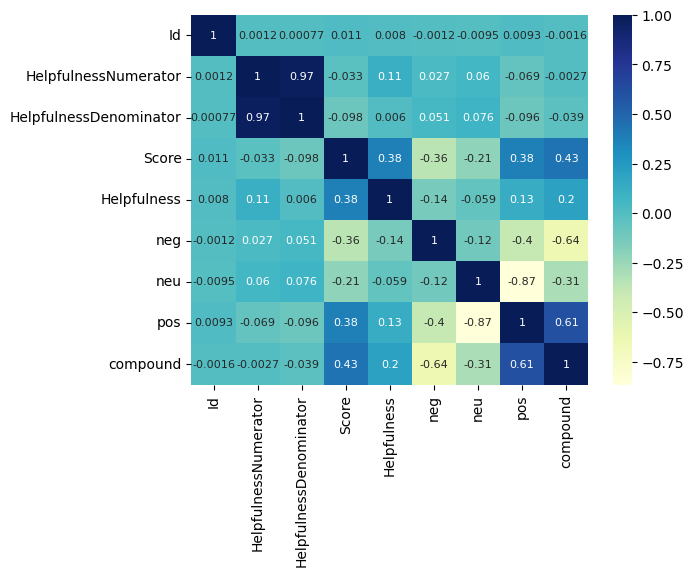

In [41]:
#Before adding feature engineering
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, annot_kws={"fontsize":8}) #Person correlation

## Modelling

In [42]:
#Feature creation


In [107]:
#number of characters
def count_chars(text):
    return len(text)

In [108]:
#number of words
def count_words(text):
    return len(text.split())

In [109]:
#number of captital words
def count_capital_words(text):
    return sum(map(str.isupper,text.split()))


In [110]:
#number of punctuations
def count_punctuations(text):
    punctuations="!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~"
    d=dict()
    for i in punctuations:
        d[str(i)+' count']=text.count(i)
    return d

In [111]:
#number of quotes
def count_words_in_quotes(text):
    x = re.findall(r'"([^"]*)"|\'([^\']*)\'', text)
    count = 0
    if x is None:
        return 0
    else:
        for i in x:
            t = i[0] if i[0] else i[1]
            count += count_words(t)
        return count

In [112]:
#number of sentences
def count_sent(text):
    return len(nltk.sent_tokenize(text))


In [113]:
#Number of unique words
def count_unique_words(text):
    return len(set(text.split()))

In [114]:
#Count stopwords
def count_stopwords(text):
    stop_words = set(stopwords.words('english'))  
    word_tokens = word_tokenize(text)
    stopwords_x = [w for w in word_tokens if w in stop_words]
    return len(stopwords_x)

In [115]:
import spacy
# Load the en_core_web_m model
nlp = spacy.load('en_core_web_sm')

In [116]:
def proper_nouns(text, model=nlp):
    # Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    
    # Return number of proper nouns
    return pos.count('PROPN')

In [117]:

def nouns(text, model=nlp):
    # Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    
    # Return number of other nouns
    return pos.count('NOUN')


In [27]:
#print(df.corr())

                              Id  HelpfulnessNumerator  \
Id                      1.000000              0.001227   
HelpfulnessNumerator    0.001227              1.000000   
HelpfulnessDenominator  0.000770              0.974689   
Score                   0.010706             -0.032590   

                        HelpfulnessDenominator     Score  
Id                                    0.000770  0.010706  
HelpfulnessNumerator                  0.974689 -0.032590  
HelpfulnessDenominator                1.000000 -0.097986  
Score                                -0.097986  1.000000  


In [137]:
#Apply Features 
import re

df_helpful['char_count'] = df_helpful["text_string_lem"].apply(lambda x:count_chars(x))
df_helpful['word_count'] = df_helpful["text_string_lem"].apply(lambda x:count_words(x))
df_helpful['sent_count'] = df_helpful["text_string_lem"].apply(lambda x:count_sent(x))
df_helpful['capital_word_count'] = df_helpful["text_string_lem"].apply(lambda x:count_capital_words(x))
df_helpful['quoted_word_count'] = df["text_string_lem"].apply(lambda x:count_words_in_quotes(x))
df_helpful['stopword_count'] = df_helpful["text_string_lem"].apply(lambda x:count_stopwords(x))
df_helpful['unique_word_count'] = df_helpful["text_string_lem"].apply(lambda x:count_unique_words(x))
df_helpful['punct_count'] = df_helpful["text_string_lem"].apply(lambda x:count_punctuations(x))
df_helpful['avg_wordlength'] = df_helpful['char_count']/df_helpful['word_count']
df_helpful['avg_sentlength'] = df_helpful['word_count']/df_helpful['sent_count']
df_helpful['unique_vs_words'] = df_helpful['unique_word_count']/df_helpful['word_count']
df_helpful['stopwords_vs_words'] = df_helpful['stopword_count']/df_helpful['word_count']


In [138]:
#view missing values
df_helpful.isnull().sum()

index                     0
Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Text                      0
text_token                0
text_string               0
text_string_fdist         0
text_string_lem           0
Helpfulness               0
polarity                  0
neg                       0
neu                       0
pos                       0
compound                  0
sentiment                 0
sent_count                0
word_count                0
char_count                0
capital_word_count        0
quoted_word_count         0
stopword_count            0
unique_word_count         0
punct_count               0
avg_wordlength            0
avg_sentlength            0
unique_vs_words           0
stopwords_vs_words        0
dtype: int64

In [77]:
#Took too long....
# Apply Count of PRORN AND NOUN columns
#df['n_PROPN'] = df['Text'].apply(proper_nouns)
#df['n_NOUN'] = df['Text'].apply(nouns)

In [139]:
#Already cleaned stop words in 'text_string_lem' column

#Build vectorizer/Encode Text
from sklearn.feature_extraction.text import TfidfVectorizer
# Build the vectorizer
vect = TfidfVectorizer(ngram_range=(1, 2), max_features=200, token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(df.text_string_lem)
X =  vect.fit_transform(df_helpful['text_string_lem'])#Create sparse matrix from the vectorizer. Better at handling large datasets

# Create a DataFrame
tf_idf_transformed = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())


print('Top 5 rows of the DataFrame: \n', tf_idf_transformed.head())

Top 5 rows of the DataFrame: 
    actually  add  added  almost  also  always  amazon  amazon com  another  \
0       0.0  0.0    0.0     0.0   0.0     0.0     0.0         0.0      0.0   
1       0.0  0.0    0.0     0.0   0.0     0.0     0.0         0.0      0.0   
2       0.0  0.0    0.0     0.0   0.0     0.0     0.0         0.0      0.0   
3       0.0  0.0    0.0     0.0   0.0     0.0     0.0         0.0      0.0   
4       0.0  0.0    0.0     0.0   0.0     0.0     0.0         0.0      0.0   

   anything  ...  way  well  whole  without  wonderful  work  worth  would  \
0       0.0  ...  0.0   0.0    0.0      0.0        0.0   0.0    0.0    0.0   
1       0.0  ...  0.0   0.0    0.0      0.0        0.0   0.0    0.0    0.0   
2       0.0  ...  0.0   0.0    0.0      0.0        0.0   0.0    0.0    0.0   
3       0.0  ...  0.0   0.0    0.0      0.0        0.0   0.0    0.0    0.0   
4       0.0  ...  0.0   0.0    0.0      0.0        0.0   0.0    0.0    0.0   

   year  years  
0   0.0    0.0

In [141]:
#List all features

Other_Features = df_helpful[['char_count', 'word_count', 'quoted_word_count','unique_word_count', 'avg_wordlength', 'unique_vs_words']]

# Combine the vectorizer with other feature columns/Merge Features:
Features = pd.concat([tf_idf_transformed, Other_Features], axis=1)

Features


,actually,add,added,almost,also,always,amazon,amazon com,another,anything,...,worth,would,year,years,char_count,word_count,quoted_word_count,unique_word_count,avg_wordlength,unique_vs_words
0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,164,23,0,21,7.130435,0.913043
1,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,282,39,0,36,7.230769,0.923077
2,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,128,18,0,18,7.111111,1.000000
3,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,71,11,0,11,6.454545,1.000000
4,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,406,61,0,50,6.655738,0.819672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.000000,0.000000,0.0,0.0,0.172955,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,252,37,0,33,6.810811,0.891892
9996,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.201155,0.000000,0.0,72,11,0,9,6.545455,0.818182
9997,0.114531,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.113441,...,0.0,0.000000,0.000000,0.0,831,126,0,105,6.595238,0.833333
9998,0.000000,0.249852,0.0,0.0,0.193356,0.0,0.186574,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,320,49,0,45,6.530612,0.918367


In [ ]:
#vectorise text col, extract col, top features
#change text col to uni/bi grams
#n-gram
#turn to dummy variables
#one hot encoding
# Target Encoding or Leave-one-out Encoding 
#keep one col, keep cat to number

In [149]:
#Create Linear regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #70% training and 30% test

# Create the X and y arrays
y = df_helpful["Helpfulness"]
X = Features

# Check the shape of the features and targets
print(X.shape, y.shape)


(10000, 206) (10000,)


In [143]:
# Create a LinearRegression object
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X, y) # Fit the model

predictions = reg.predict(X) # Make predictions

print(predictions[:5])

[0.81008229 0.61905659 0.67259622 0.70792162 0.73314975]


In [150]:
# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [0.54048551 0.59358292], Actual Values: 6252    1.000000
4684    0.818182
Name: Helpfulness, dtype: float64


In [152]:
#Regression performance

# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.055308716720530726
RMSE: 0.3441169967741597


In [153]:
#Cross validation

#R-squared for each fold ranged between 0.21059123 and 0.21551296
# using cross-validation, we can see how performance varies depending on how the data is split

# Import the necessary modules
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_scores)

[0.09901149 0.07659314 0.05539998 0.10179489 0.08196326 0.08016607]


In [154]:
#Analysing cross validation metrics
#average score of 0.209 and a low standard deviation

# Print the mean
print(np.mean(cv_scores))

# Print the standard deviation
print(np.std(cv_scores))

# Print the 95% confidence interval
print(np.quantile(cv_scores, [0.025, 0.975]))

0.08248813881211108
0.015383749287190903
[0.05804913 0.10144696]


In [155]:
#Regularized regression
#Ridge expression
#The scores don't appear to change much as alpha increases, which is indicative of how well the features explain the variance in the target—even by heavily penalizing large coefficients, underfitting does not occur

# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)


[0.05574156579751943, 0.05882550181132684, 0.07165586244004374, 0.057205367788091155, 0.016918318783419983, 0.0076638849244018425]


[-0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000

TypeError: only size-1 arrays can be converted to Python scalars

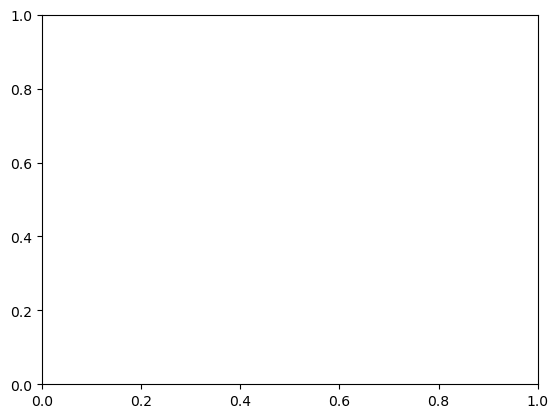

In [156]:
#Lasso regression for feature importance

# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)
plt.bar(Features, lasso_coef)
plt.xticks(rotation=45)
plt.show()

In [148]:
# Import matplotlib.pyplot
#import matplotlib.pyplot as plt

# Create scatter plot
#plt.scatter(X, y, color="blue")

# Create line plot
#plt.plot(X, predictions, color="red")
#plt.xlabel("X")
#plt.ylabel("y")

# Display the plot
#plt.show()

Text(0.5, 1.0, 'Boxplot Helpfulness vs Score')

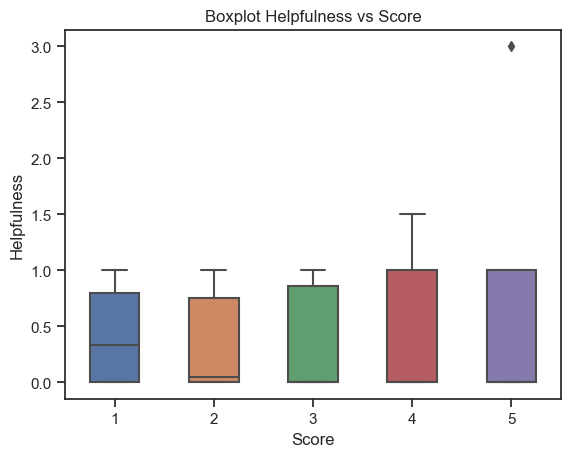

In [260]:
sns.boxplot(x = "Score",
            y = "Helpfulness",
            width=0.5,
            data =df);
plt.title('Boxplot Helpfulness vs Score')

## Random Forest Classifier + Feature Importance

In [262]:
#Can use on topics/columns
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Text                       0
text_word_count            0
text_token                 0
text_string                0
text_string_fdist          0
text_string_lem            0
polarity                   0
neg                        0
neu                        0
pos                        0
compound                   0
sentiment                  0
Helpfulness                0
dtype: int64

In [263]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 10 categorical variables

The categorical variables are :

 ['ProductId', 'UserId', 'ProfileName', 'Text', 'text_token', 'text_string', 'text_string_fdist', 'text_string_lem', 'polarity', 'sentiment']


In [264]:
df[categorical].head()

,ProductId,UserId,ProfileName,Text,text_token,text_string,text_string_fdist,text_string_lem,polarity,sentiment
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,i have bought several of the vitality canned d...,"[bought, several, vitality, canned, dog, food,...",bought several vitality canned dog food produc...,bought several vitality canned dog food produc...,bought several vitality canned dog food produc...,"{'neg': 0.0, 'neu': 0.503, 'pos': 0.497, 'comp...",positive
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, jumbo, salted, pea...",product arrived labeled jumbo salted peanuts p...,product arrived labeled jumbo salted peanuts p...,product arrived labeled jumbo salted peanuts p...,"{'neg': 0.129, 'neu': 0.762, 'pos': 0.11, 'com...",negative
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",this is a confection that has been around a fe...,"[confection, around, centuries, light, pillowy...",confection around centuries light pillowy citr...,confection around centuries light pillowy citr...,confection around centuries light pillowy citr...,"{'neg': 0.171, 'neu': 0.544, 'pos': 0.285, 'co...",positive
3,B000UA0QIQ,A395BORC6FGVXV,Karl,if you are looking for the secret ingredient i...,"[looking, secret, ingredient, robitussin, beli...",looking secret ingredient robitussin believe f...,looking secret ingredient robitussin believe f...,looking secret ingredient robitussin believe f...,"{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'comp...",positive
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",great taffy at a great price. there was a wid...,"[great, taffy, great, price, wide, assortment,...",great taffy great price wide assortment yummy ...,great taffy great price wide assortment yummy ...,great taffy great price wide assortment yummy ...,"{'neg': 0.0, 'neu': 0.369, 'pos': 0.631, 'comp...",positive


In [266]:
#Explore helpfulness target variable
df['Helpfulness'].isnull().sum()#Helpfulness Target Variable

0

In [267]:
# view number of unique values
df['Helpfulness'].nunique()

951

In [268]:
# view the unique values

df['Helpfulness'].unique()

array([1.        , 0.        , 0.8       , 0.5       , 0.66666667,
       0.25      , 0.89473684, 0.83333333, 0.75      , 0.33333333,
       0.3       , 0.11111111, 0.42857143, 0.875     , 0.85714286,
       0.2       , 0.26315789, 0.6       , 0.71428571, 0.53846154,
       0.57142857, 0.91489362, 0.86666667, 0.82352941, 0.78571429,
       0.74074074, 0.4       , 0.375     , 0.28571429, 0.14285714,
       0.77777778, 0.125     , 0.9       , 0.94117647, 0.92307692,
       0.7       , 0.45454545, 0.88888889, 0.83870968, 0.9047619 ,
       0.92857143, 0.90909091, 0.91666667, 0.84615385, 0.10526316,
       0.98214286, 0.97826087, 0.7518797 , 0.3125    , 0.1       ,
       0.18518519, 0.88      , 0.69230769, 0.625     , 0.54545455,
       0.41666667, 0.45833333, 0.22222222, 0.81818182, 0.8125    ,
       0.16666667, 0.93103448, 0.88235294, 0.23529412, 0.63636364,
       0.81481481, 0.95652174, 0.64285714, 0.58333333, 0.94444444,
       0.921875  , 0.86574074, 0.96      , 0.91304348, 0.64705

In [269]:
# view the frequency distribution of values
df['Helpfulness'].value_counts()

0.000000    303826
1.000000    183309
0.500000     21623
0.666667     10514
0.750000      6364
             ...  
0.946237         1
0.232558         1
0.704545         1
0.161290         1
0.991411         1
Name: Helpfulness, Length: 951, dtype: int64

In [1]:
# view percentage of frequency distribution of values
df['Helpfulness'].value_counts()/len(df)

NameError: name 'df' is not defined

In [ ]:
# visualize frequency distribution of income variable

f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = df['Helpfulness'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Helpfulness Rating')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="Helpfulness", data=df, palette="Set1")
ax[1].set_title("Frequency distribution of Helpfulness variable")

plt.show()# visualize frequency distribution of income variable

f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = df['Helpfulness'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Helpfulness Rating')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="Helpfulness", data=df, palette="Set1")
ax[1].set_title("Frequency distribution of Helpfulness Rating")

plt.show()

## Topic modelling with BERTopic

In [2]:
#conda install -c conda-forge bertopic
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

df_bert = df['text_string_lem']

vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words=stopwords)

model = BERTopic(
    vectorizer_model=vectorizer_model,
    language='english', calculate_probabilities=True,
    verbose=True
)
topics, probs = model.fit_transform(df_bert) #create topics

/Users/anna/anaconda3/envs/py39/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'df' is not defined

In [ ]:
freq = model.get_topic_info()
freq.head(10)

In [ ]:
model.get_topic_info(0) #select most frequent topic

In [ ]:
model.visualize_topics()

In [ ]:
#we can also extract information on a document level, such as their corresponding topics, probabilities, whether they are representative documents for a topic, etc.:
model.get_document_info(df_bert)

In [ ]:
#Visualize Topic Probabilities

model.visualize_distribution(probs[0])

In [ ]:
model.visualize_barchart()

In [ ]:
# Hierarchical topics
from scipy.cluster import hierarchy as sch

linkage_function = lambda x: sch.linkage(x, 'single', optimal_ordering=True)
hierarchical_topics = model.hierarchical_topics(queries, linkage_function=linkage_function)

In [ ]:
model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)


In [ ]:
#text based hierarchy so we can see better which topics could be logically merged
tree = model.get_topic_tree(hierarchical_topics)
print(tree)

In [ ]:
#Visualize Topic Similarity 
model.visualize_heatmap()

In [256]:
#Model selection
#conda install -c conda-forge xgboost
import xgboost
import matplotlib.pyplot as plt

model = xgboost.XGBClassifier()
model.fit(X,y)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got [1 2 3 4 5]

In [ ]:
X_train,y_train,X_test,y_test = train_test_split(data,test_size=0.3)


In [ ]:
#kneighbour
#helpfulness contiuos vairbale 
#linear regression model


In [134]:
Suggested Models:

Bidirectional Encoder Representations from Transformers

Regression models:

Tree-based Models:

Deep Learning:


	
Vanilla NN
	
RNN/Sequence Models 
	

		
LSTM (Long Short-Term Memory)
		
GRU (Gated Recurrent Unit)
		
Bi-directional
	
	
	
Encoder-decoder (+ Attention mechanism)
	
Transformers (stacked encoder-decoder)
	
Fine-tuning pre-trained models


 

Try different types of models

SyntaxError: invalid syntax (594581954.py, line 1)

In [ ]:
######################### WORK IN PROGRESS #######################################################

Sentiment analysis and regression models to analyse amazon food reviews affecting the helpfulness score

Unsupervised
sentiment models: feed into features
prediction for score and helpfulness. Target: rating/helpfulness

Feature building provides paveway to the model
- cat boost

#give model for feedback to provide
#EDA: K-means to cluster topic model beginning: feature to feed into classification model
#focus on NLP

In [ ]:
#Test analysis techniques
#Classification
#extraction
#Frequency
#collocation
#Concordance 
#clustering

#product and user id can be predicted
#summary


In [ ]:
#Sentiment analysis with deep learning
#find what is positive and negative
#Modality, negative words, negative sentiment, negative emotion
#Predict the sentiment of a review
#Hugging-face roberta model


In [ ]:
#Logistic regression: Predict if a review is postive or negative based on summary/text
#Test Accuracy
#Confusion matrix


In [ ]:
#DL for text classification - keras
#Baseline model: Overfitting/underfitting
#Deep neural network
#Improve accuracy of model


In [ ]:
#Investigate the causes of negative reviews - what makes a review negative?

In [ ]:
#Predict helpfulness of a review

In [1]:
#Find repeating product reviews from user

In [ ]:
#DL models
#Topis classification with deep learning -> justify models
#Sentiment
#intent